# Voronoi Cell Tool Box package
We use the package to define the Voronoi cell of a specific lattice given by the matrix M

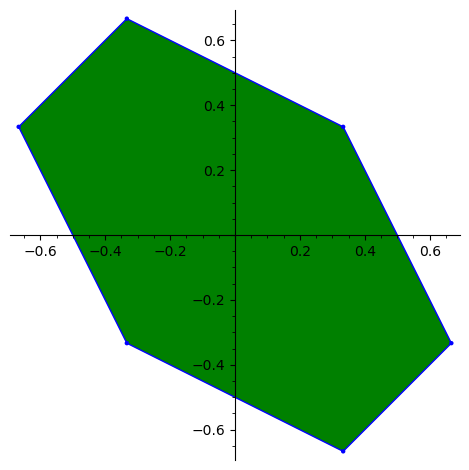

In [1]:
from VoronoiCellToolBox.voronoi_cell import VCell
VCell([[2, 1], [1, 2]], range=2).plot()

In this cell we test the function pos

In [2]:
from VoronoiCellToolBox.voronoi_cell import FromMatrixPositionToListPosition
print("FromMatrixPositionToListPosition(0, 1, 3) = ", FromMatrixPositionToListPosition(0, 1, 3))  # Returns 1
print("FromMatrixPositionToListPosition(1, 2, 3) = ", FromMatrixPositionToListPosition(1, 2, 3))  # Returns 4
print("FromMatrixPositionToListPosition(2, 2, 3) = ", FromMatrixPositionToListPosition(2, 2, 3))  # Returns 5

FromMatrixPositionToListPosition(0, 1, 3) =  1
FromMatrixPositionToListPosition(1, 2, 3) =  4
FromMatrixPositionToListPosition(2, 2, 3) =  5


Here we test the function `matrixify`
Converts a list of upper triangular entries into a $d \times d$ matrix.

In [3]:
from VoronoiCellToolBox.voronoi_cell import matrixify
print("matrixify([3, 1, 5, 3, -1, 2], 3) = ", matrixify([3, 1, 5, 3, -1, 2], 3)) #[3, 1, 5], [1, 3, -1], [5, -1, 2]]


matrixify([3, 1, 5, 3, -1, 2], 3) =  [[3, 1, 5], [1, 3, -1], [5, -1, 2]]


The following function finds the linear inequality that a matrix must satisfy in order for a particular potential relevant vector nonRelevantVectors to not be relevant due to the conditions imposed by the list of relevant vectors neighborVectors 

Computes the equation of the wall in the secondary cone.

In [4]:
from VoronoiCellToolBox.voronoi_cell import eq_of_wall
rvecs = [(0, 1, 1), (1, 1, 1), (0, 0, 1)]
nrvec = [-1, 0, 0]
eq_of_wall(rvecs, nrvec, 3, False)

[2, 2, 2, 0, 0, 0]

The function reduce makes sure the Rational structures on our vectors are regularly updated to clear large denominators, bringing about an increase in performance

In [5]:
from VoronoiCellToolBox.voronoi_cell import lcmReduce
v = [31,3.2, 312]
lcmReduce([Rational(int(round(vi*10**9)),int(10**9)) for vi in v])

(155, 16, 1560)

The function gcdReduce makes sure the Integer structures on our vectors are regularly updated to clear large denominators, bringing about an increase in performance

In [6]:
from VoronoiCellToolBox.voronoi_cell import gcdReduce
gcdReduce([12, 24, 34])

[6, 12, 17]

The function ``gcd`` and ``GCD_list`` implement the Euclidean algorithm to compute the greatest common divisor of two integers or a list of integers

In [7]:
from VoronoiCellToolBox.voronoi_cell import gcd, GCD_list
print("gcd(48, 18) = ", gcd(48, 18))
print("GCD_list([102, 304, 54, 80]) = ", GCD_list([102, 304, 54, 80]))

gcd(48, 18) =  6
GCD_list([102, 304, 54, 80]) =  2


For a facet F of the voronoi cell V, this function computes the corresponding relevant vector.

In [8]:
from VoronoiCellToolBox.voronoi_cell import relevant_vector, VCell
#The following code prints the relevant vectors of each facet for d = 2
Q = [[2, -1], [-1, 2]]
VC = VCell(Q, range = 2)
list_facets = VC.facets()
for F in list_facets:
    print(F.vertices(), " - ", relevant_vector(Q, F))

(A vertex at (-1/3, -2/3), A vertex at (1/3, -1/3))  -  (0, -1)
(A vertex at (2/3, 1/3), A vertex at (1/3, 2/3))  -  (1, 1)
(A vertex at (1/3, 2/3), A vertex at (-1/3, 1/3))  -  (0, 1)
(A vertex at (2/3, 1/3), A vertex at (1/3, -1/3))  -  (1, 0)
(A vertex at (-1/3, -2/3), A vertex at (-2/3, -1/3))  -  (-1, -1)
(A vertex at (-1/3, 1/3), A vertex at (-2/3, -1/3))  -  (-1, 0)


For a metric matrix $Q$ we can compute the norm of any vector in $Z^d$ with the function $Qnorm(v, Q) = v^T Q v$.

In [9]:
from VoronoiCellToolBox.voronoi_cell import Qform
Qform([1, 2], [[1, 0], [0, 1]]) #Returns 5

5

For a metric matrix $Q$ we can compute the point that is equidistant to a collection of other points

In [10]:
from VoronoiCellToolBox.voronoi_cell import equidistantPoint
equidistantPoint([vector([1, 0]), vector([0, 1])], Matrix([[2, -1], [-1, 2]])) #Returns [1, 1]

(1, 1)

Computes a dictionary, exposing the relevant vectors associated with each vertex of $P$.
relevantVectorDictionary(P, Q)For each vertex v, the relevant vector relative to each facet incident to v is computed.

In [11]:
from VoronoiCellToolBox.voronoi_cell import VCell, relevantVectorDictionary

Q = [[3, -1, -1], [-1, 3, -1], [-1, -1, 3]]
P = VCell(Q, range = 2)
len(relevantVectorDictionary(P, Q))# Returns 24

24

The function secondary_cone computes a Polyhedron type object that describes all matrices $Q'$ whose Voronoi cell has the same relevant vector structure as $Q$ 

In [12]:
from VoronoiCellToolBox.voronoi_cell import secondary_cone, rayify
import itertools
Q = [[3, -1, -1], [-1, 3, -1], [-1, -1, 3]]
prv = [list(vec) for vec in itertools.product(range(-2, 3), repeat=3)]
prv.remove([0] * 3)
SC = secondary_cone(Q, range = 2)
rayify(SC)

[(1, -1, 0, 1, 0, 0),
 (1, 0, -1, 0, 0, 1),
 (0, 0, 0, 1, -1, 1),
 (0, 0, 0, 0, 0, 1),
 (0, 0, 0, 1, 0, 0),
 (1, 0, 0, 0, 0, 0)]

We also implement the pulling triangulation here

In [13]:
from VoronoiCellToolBox.voronoi_cell import VCell, pulling_triangulation
Q = [[3, -1, -1], [-1, 3, -1], [-1, -1, 3]]
P = VCell(Q, range=2)
len(pulling_triangulation(P))

34

The pulling triangulation will be handed off to Macaulay2 in order to compute the second moment polynomial expression with respect to the entries of $Q$

Delaunay polytope corresponding to each vertex

In [14]:
from VoronoiCellToolBox.voronoi_cell import VCell, Delsets
Q = [[3, -1, -1], [-1, 3, -1], [-1, -1, 3]]
VC = VCell(Q, range=2)
len(Delsets(VC, Q, range=2))

24

Overlays a Delaunay polytope with the Voronoi cell

In [15]:
from VoronoiCellToolBox.voronoi_cell import VCell, Delsets
import random

Q = [[2, 1, 1], [1, 2, 1], [1, 1, 2]]
VC = VCell(Q, range=1)
D_dict = Delsets(VC, Q, range = 1)
vertices = VC.vertices()
v = vertices[random.randint(0, len(vertices))]
D = D_dict[tuple(v)]

plot1 = VC.plot(color='red', opacity=0.5)
plot2 = D.plot(color='blue', opacity=0.5)

# Combine the plots
(plot1 + plot2).show()

Graphics3d Object

In [16]:
from VoronoiCellToolBox.voronoi_cell import VCell, Delset
import random

Q = [[2, 1, 1], [1, 2, 1], [1, 1, 2]]
VC = VCell(Q, range=1)
vertices = VC.vertices()
v = vertices[random.randint(0, len(vertices) - 1)]
Delset(Q, v, range = 2)#[(0, 0, 0), (-1, 0, 1), (-1, 1, 0), (-1, 1, 1), (0, 0, 1), (0, 1, 0)]

[(0, 0, 0), (-1, -1, 1), (-1, 0, 0), (-1, 0, 1), (0, -1, 0), (0, -1, 1)]

The function **FormatPullingTrigMatrix** is used to create a Macaulay2 object that can be used to compute relevant polynomials.

In [17]:
from VoronoiCellToolBox.macaulay_parsing import FormatPullingTrigMatrix

Q = [[2, -1], [-1, 2]]
FormatPullingTrigMatrix(Q)

'{{matrix{{1, 0}, {1, 1}},matrix{{0, -1}, {-1, -1}},matrix{{0, 1}, {-1, 0}}},{matrix{{1, 0}, {1, 1}},\n matrix{{0, 1}, {-1, 0}},matrix{{1, 1}, {1, 0}}},{matrix{{1, 0}, {1, 1}},matrix{{-1, -1}, {-1, 0}},matrix{\n {0, -1}, {-1, -1}}},{matrix{{1, 0}, {1, 1}},matrix{{-1, -1}, {-1, 0}},matrix{{0, -1}, {1, 0}}}}'

With this string we can use the orchestration part of the package to generate Macaulay output

In [26]:
import re

def clean_m2_poly(m2_string):
    """
    Cleans a Macaulay2 polynomial string for Python's eval().
    1. Fixes M2 power operator: ^ -> **
    2. Inserts '*' for implied multiplication: '2x' -> '2*x', 'xy' -> 'x*y'
    """
    # Step 1: Fix power operator
    cleaned_string = m2_string.replace('^', '**')

    # Step 2: Insert '*' for implied multiplication using RegEx
    # Pattern to find implied multiplication:
    # Look for a digit/variable/close-parenthesis followed immediately by 
    # an open-parenthesis or a variable.
    
    # [a-zA-Z0-9)] - character before the implied product
    # [a-zA-Z(]    - character after the implied product
    
    # This pattern covers:
    # 2x -> 2*x  (digit followed by letter)
    # xy -> x*y  (letter followed by letter)
    # 2(x+y) -> 2*(x+y) (digit followed by parenthesis)
    # x(y+z) -> x*(y+z) (letter followed by parenthesis)
    
    # We use a lookahead to avoid capturing the second character, 
    # which simplifies the replacement string.
    
    pattern = r'([a-zA-Z0-9\)])([a-zA-Z\(])'
    
    # The replacement inserts a '*' between the two captured groups (\1 and \2)
    cleaned_string = re.sub(pattern, r'\1*\2', cleaned_string)
    
    return cleaned_string


def rpl(string, q0, q1, q2):
    nstring = clean_m2_poly(string)
    return eval(nstring.replace("}", "]").replace("{", "[").replace("q_1", str(q1)).replace("q_2", str(q2)).replace("q_0", str(q0)))

0.2608695652173913
-0.028985507246376812
-0.06159420289855073
0.22826086956521738
0.43333333333333335


In [20]:
from VoronoiCellToolBox.voronoi_cell import VertexFromRelevantVectors
q0 = 2
q1 = -1
q2 = 2
Q = [[q0, q1], [q1, q2]]

info = "{{matrix {{0, -1}, {-1, -1}}, matrix {{1, 0}, {1, 1}}, matrix {{1, 1}, {1, 0}}}, {matrix {{0, -1}, {-1, -1}}, matrix {{0, -1}, {1, 0}}, matrix {{1, 0}, {1, 1}}}, {matrix {{0, -1}, {-1, -1}}, matrix {{0, 1}, {-1, 0}}, matrix {{1, 1}, {1, 0}}}, {matrix {{0, -1}, {-1, -1}}, matrix {{-1, -1}, {-1, 0}}, matrix {{0, -1}, {1, 0}}}}"
info = eval(info.replace("matrix", "").replace("}", "]").replace("{", "["))
for triangle in info:
    for vert in triangle:
        print(VertexFromRelevantVectors(vert, Q))
    print("---"*10)


(-1/3, -2/3)
(1/3, 2/3)
(2/3, 1/3)
------------------------------
(-1/3, -2/3)
(-1/3, 1/3)
(1/3, 2/3)
------------------------------
(-1/3, -2/3)
(1/3, -1/3)
(2/3, 1/3)
------------------------------
(-1/3, -2/3)
(-2/3, -1/3)
(-1/3, 1/3)
------------------------------


In [21]:
vertices_inpolyform = "matrix {{(-2*q_1^2+q_0*q_2-q_1*q_2)/(2*q_1^2-2*q_0*q_2), (q_0*q_2+q_1*q_2)/(2*q_1^2-2*q_0*q_2), (-q_0*q_2-q_1*q_2)/(2*q_1^2-2*q_0*q_2)}, {(q_0*q_1+q_0*q_2)/(2*q_1^2-2*q_0*q_2), (-q_0*q_1-2*q_1^2+q_0*q_2)/(2*q_1^2-2*q_0*q_2), (q_0*q_1+q_0*q_2)/(2*q_1^2-2*q_0*q_2)}}"
vertices_inpolyform = rpl(vertices_inpolyform.replace("matrix", "").replace("}", "]").replace("{", "["), 2, -1, 2)
print(vertices_inpolyform)

[[-0.8, -0.2, 0.2], [-0.2, -0.8, -0.2]]


In [22]:
def rpl(string, q0, q1, q2):
    nstring = clean_m2_poly(string)
    return eval(nstring.replace("}", "]").replace("{", "[").replace("q_1", str(q1)).replace("q_2", str(q2)).replace("q_0", str(q0)))
smtriang1 = "(2*q_0*q_1^4-2*q_1^5-3*q_0^2*q_1^2*q_2+2*q_0*q_1^3*q_2+2*q_1^4*q_2+3*q_0^2*q_1*q_2^2-5*q_0*q_1^2*q_2^2+q_0*q_1*q_2^3)/(24*q_1^4-48*q_0*q_1^2*q_2+24*q_0^2*q_2^2)"
smtriang2 = "(2*q_0*q_1^4-2*q_1^5+q_0^3*q_1*q_2-5*q_0^2*q_1^2*q_2+2*q_0*q_1^3*q_2+2*q_1^4*q_2+3*q_0^2*q_1*q_2^2-3*q_0*q_1^2*q_2^2)/(24*q_1^4-48*q_0*q_1^2*q_2+24*q_0^2*q_2^2)"
smtriang3 = "(q_0^3*q_2^2-3*q_0^2*q_1*q_2^2+2*q_0*q_1^2*q_2^2+q_0^2*q_2^3-q_0*q_1*q_2^3)/(24*q_1^4-48*q_0*q_1^2*q_2+24*q_0^2*q_2^2)"
smtriang4 = "(-q_0^3*q_1*q_2+2*q_0^2*q_1^2*q_2+q_0^3*q_2^2-3*q_0^2*q_1*q_2^2+q_0^2*q_2^3)/(24*q_1^4-48*q_0*q_1^2*q_2+24*q_0^2*q_2^2)"
print(rpl(smtriang1, 2, 1, 2))
print(rpl(smtriang2, 2, 1, 2))
print(rpl(smtriang3, 2, 1, 2))
print(rpl(smtriang4, 2, 1, 2))

poly ="(2*q_0*q_1^2-2*q_1^3-q_0^2*q_2+2*q_1^2*q_2-q_0*q_2^2)/(12*q_1^2-12*q_0*q_2)"
print(rpl(poly, 2, 1, 2))


0.06481481481481481
0.06481481481481481
0.07407407407407407
0.07407407407407407
0.2777777777777778


## VertexFromRelevantVectors Function

The `VertexFromRelevantVectors` function computes vertex coordinates from a matrix of relevant vectors using the formula:

$$\vec{v} = \frac{1}{2} Q^{-1}(B^T)^{-1}b_Q$$

where $b_Q$ is a vector whose $i$-th component is the $Q$-norm of the $i$-th column of $B$.

In [23]:
from VoronoiCellToolBox.voronoi_cell import VertexFromRelevantVectors

# Example 1: Identity metric with identity vectors
Q = [[1, 0], [0, 1]]
B = [[1, 0], [0, 1]]
v = VertexFromRelevantVectors(B, Q)
print("Example 1 - Identity metric and vectors:")
print("Q =", Q)
print("B =", B)
print("Result v =", v)
print()

# Example 2: Non-diagonal metric
Q = [[2, -1], [-1, 2]]
B = [[1, 0], [0, 1]]
v = VertexFromRelevantVectors(B, Q)
print("Example 2 - Non-diagonal metric, intersection of non adjacent facets of the voronoi cell (This is not a vertex of a voronoi cell!):")
print("Q =", Q)
print("B =", B)
print("Result v =", v)
print()

# Example 3: 3D metric
Q = [[3, -1, -1], [-1, 3, -1], [-1, -1, 3]]
B = [[1, 1, 1], [0, 1, 1], [0, 0, 1]]
v = VertexFromRelevantVectors(B, Q)
print("Example 3 - 3D metric:")
print("Q =", Q)
print("B =", B)
print("Result v =", v)

Example 1 - Identity metric and vectors:
Q = [[1, 0], [0, 1]]
B = [[1, 0], [0, 1]]
Result v = (1/2, 1/2)

Example 2 - Non-diagonal metric, intersection of non adjacent facets of the voronoi cell (This is not a vertex of a voronoi cell!):
Q = [[2, -1], [-1, 2]]
B = [[1, 0], [0, 1]]
Result v = (1, 1)

Example 3 - 3D metric:
Q = [[3, -1, -1], [-1, 3, -1], [-1, -1, 3]]
B = [[1, 1, 1], [0, 1, 1], [0, 0, 1]]
Result v = (3/4, 1/2, 1/4)


## secondMomentMatrix Function

The `secondMomentMatrix` function computes the second moment of the Voronoi cell in the inherited metric given by $Q$.

The computation uses the pulling triangulation and the formula:
$$\text{SM}_Q(\mathcal{T}) = \frac{\det(T)}{\sqrt{\det Q} \cdot (d+2)!} \left( ||(d+1)\hat{s}||_Q^2 + \sum_{i=0}^d ||\vec{s}_i||_Q^2 \right)$$

where $T$ is the matrix of edge vectors, $\hat{s}$ is the barycenter, and $\vec{s}_i$ are the vertices.

In [24]:
from VoronoiCellToolBox.voronoi_cell import secondMomentMatrix

# Example 1: 2D metric
Q = [[2, -1], [-1, 2]]
sm = secondMomentMatrix(Q, range=2)
print("Example 1 - 2D metric:")
print("Q =", Q)
print("Second moment (in inherited metric) =", sm, " target is 5/( sqrt(3) * 18) = ", (3.0**(-0.5)) * 5.0/18, " computed manually")
print()

# Example 2: Identity metric in 2D
Q = [[1, 0], [0, 1]]
sm = secondMomentMatrix(Q, range=2)
print("Example 2 - Identity metric in 2D:")
print("Q =", Q)
print("Second moment (in inherited metric) =", sm, " target is 1/6 = ", 1/6.0, " computed manually")
print()

# Example 3: 3D metric
Q = [[3, -1, -1], [-1, 3, -1], [-1, -1, 3]]
sm = secondMomentMatrix(Q, range=2)
print("Example 3 - 3D metric:")
print("Q =", Q)
print("Second moment (in inherited metric) =", sm)
print()

# Example 4: 3D Identity metric
Q = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
sm = secondMomentMatrix(Q, range=2)
print("Example 4 - 3D Identity metric:")
print("Q =", Q)
print("Second moment (in inherited metric) =", sm, " target is 1/4 = ", 1/4.0, " computed manually")
print()

# Example 4: 4D Identity metric
Q = [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]
sm = secondMomentMatrix(Q, range=2)
print("Example 5 - 4D Identity metric:")
print("Q =", Q)
print("Second moment (in inherited metric) =", sm, " target is 1/3 = ", 1/3.0, " computed manually")

Example 1 - 2D metric:
Q = [[2, -1], [-1, 2]]
Second moment (in inherited metric) = 0.16037507477489601  target is 5/( sqrt(3) * 18) =  0.160375074774896  computed manually

Example 2 - Identity metric in 2D:
Q = [[1, 0], [0, 1]]
Second moment (in inherited metric) = 0.16666666666666666  target is 1/6 =  0.166666666666667  computed manually

Example 3 - 3D metric:
Q = [[3, -1, -1], [-1, 3, -1], [-1, -1, 3]]
Second moment (in inherited metric) = 0.14843749999999997

Example 4 - 3D Identity metric:
Q = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
Second moment (in inherited metric) = 0.25  target is 1/4 =  0.250000000000000  computed manually

Example 5 - 4D Identity metric:
Q = [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]
Second moment (in inherited metric) = 0.3333333333333333  target is 1/3 =  0.333333333333333  computed manually


---

In [25]:
from VoronoiCellToolBox.orchestration import normalizedChamberSecondMomentPolynomial

q0 = 2
q1 = -1
q2 = 2
Q = [[q0, q1], [q1, q2]]
poly = normalizedChamberSecondMomentPolynomial(Q, verbose = True)
print("Rational function computed with Macaulay2 = \n      ", poly)
evaluation = eval(poly.replace("^", "**").replace("q_0", str(q0)).replace("q_1", str(q1)).replace("q_2", str(q2)))
print("Rational function evaluated at q_0 =", q0, ", q_1 =", q1, ", q2 =", q2, " is", evaluation)
print("Manually computed value = ", eval("5/18"))#Tested manualy, we get this value

Debug 4: result =                         2        2
oo1000000015 : Matrix ZZ  <--- ZZ
(Starting SmPoly computation for dimension , 2)
(Number of triangles: , 4)
Verbose mode enabled
(Vertex matrices, {{matrix {{0, -1}, {1, 0}}, matrix {{0, -1}, {-1, -1}}, matrix {{0, 1}, {-1, 0}}}, {matrix {{0, -1}, {1, 0}}, matrix {{1, 0}, {1, 1}}, matrix {{1, 1}, {1, 0}}}, {matrix {{0, -1}, {1, 0}}, matrix {{0, 1}, {-1, 0}}, matrix {{1, 1}, {1, 0}}}, {matrix {{0, -1}, {1, 0}}, matrix {{-1, -1}, {-1, 0}}, matrix {{0, -1}, {-1, -1}}}})
(Metric matrix, matrix {{2, -1}, {-1, 2}})
0 of total 4 - new loop
(Computing vertex from relevant vectors with B = , matrix {{0, -1}, {1, 0}},  and Q = , matrix {{q_0, q_1}, {q_1, q_2}})
(Dimension d = , 2)
Computing Q-norm matrix format of B
(Q-norm matrix format: , matrix {{q_2}, {q_0}})
Computing inverse of transpose of B
(Inverse of transpose of B: , matrix {{0, -1}, {1, 0}})
Computing inverse of cofactor matrix of Q
(Inverse of cofactor matrix of Q: , matrix {{(-q

Goal for the logs progress:
- Polynomial expression of the vertices
- Polynomial expression of the second moment of each triangle
- If Superverbose, then intermediate steps for each computation (Qform vector, inverse transpose, etc)

In [ ]:
smtriang1 = "(-q_0^3*q_1*q_2-4*q_0^2*q_1^2*q_2-4*q_0*q_1^3*q_2-2*q_0^2*q_1*q_2^2-4*q_0*q_1^2*q_2^2-q_0*q_1*q_2^3)/(24*q_1^4-48*q_0*q_1^2*q_2+24*q_0^2*q_2^2)"
smtriang2 = "(q_0^3*q_2^2+3*q_0^2*q_1*q_2^2+2*q_0*q_1^2*q_2^2+q_0^2*q_2^3+q_0*q_1*q_2^3)/(24*q_1^4-48*q_0*q_1^2*q_2+24*q_0^2*q_2^2)"
smtriang3 = "(2*q_0*q_1^4+2*q_1^5+q_0^3*q_1*q_2+q_0^2*q_1^2*q_2+2*q_0*q_1^3*q_2+2*q_1^4*q_2+q_0^3*q_2^2+2*q_0^2*q_1*q_2^2+q_0*q_1^2*q_2^2+q_0^2*q_2^3+q_0*q_1*q_2^3)/(24*q_1^4-48*q_0*q_1^2*q_2+24*q_0^2*q_2^2)"
smtriang4 = "(2*q_0*q_1^4+2*q_1^5-3*q_0^2*q_1^2*q_2-2*q_0*q_1^3*q_2+2*q_1^4*q_2-3*q_0^2*q_1*q_2^2-5*q_0*q_1^2*q_2^2-q_0*q_1*q_2^3)/(24*q_1^4-48*q_0*q_1^2*q_2+24*q_0^2*q_2^2)"
print(rpl(smtriang1, 2, -1, 2))
print(rpl(smtriang2, 2, -1, 2))
print(rpl(smtriang3, 2, -1, 2))
print(rpl(smtriang4, 2, -1, 2))

poly ="(2*q_0*q_1^2+2*q_1^3-q_0^2*q_2+2*q_1^2*q_2-q_0*q_2^2)/(12*q_1^2-12*q_0*q_2)"
print(rpl(poly, 2, -1, 2))
